In [1]:
!pip install torchvision --upgrade
!nvidia-smi  # Verify GPU

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

# GPU setup
assert torch.cuda.is_available(), "Enable GPU in Colab: Runtime > Change runtime type > GPU"
device = torch.device("cuda")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Update this path to your dataset location
DATA_ROOT = "/content/drive/MyDrive/542Project"

In [5]:
train_test_split_file = "/content/drive/MyDrive/542Project/train_test_split.txt"


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import matplotlib.pyplot as plt

Train samples: 600
Test samples: 515


Image shape: torch.Size([3, 224, 224])
Label: 0


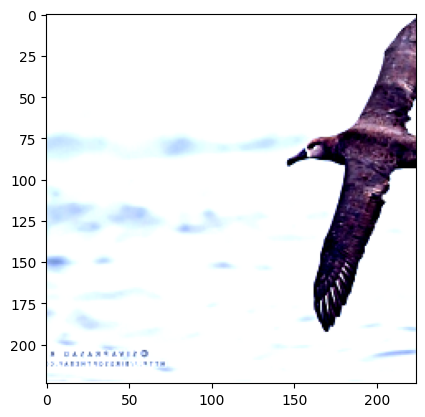

Epoch 1: Loss 74.7729, Train Acc 8.17%
Test Accuracy: 12.62%

Epoch 2: Loss 6.8665, Train Acc 9.50%
Test Accuracy: 9.71%

Epoch 3: Loss 2.9280, Train Acc 4.50%
Test Accuracy: 10.49%

Epoch 4: Loss 2.8999, Train Acc 7.83%
Test Accuracy: 9.51%

Epoch 5: Loss 2.8813, Train Acc 9.00%
Test Accuracy: 10.87%

Epoch 6: Loss 2.8893, Train Acc 9.00%
Test Accuracy: 9.13%

Epoch 7: Loss 2.8779, Train Acc 8.83%
Test Accuracy: 10.49%

Epoch 8: Loss 2.8687, Train Acc 10.50%
Test Accuracy: 10.68%

Epoch 9: Loss 2.8393, Train Acc 12.00%
Test Accuracy: 10.87%

Epoch 10: Loss 2.8383, Train Acc 11.33%
Test Accuracy: 11.65%



In [10]:
# 3. Complete BirdDataset Class with Train/Test Split
class BirdDataset(Dataset):
    def __init__(self, root_dir, transform=None, train=True, num_classes=20):
        self.root_dir = root_dir
        self.transform = transform
        self.train = train
        self.num_classes = num_classes
        self.image_paths = []
        self.labels = []

        # Load splits
        with open(os.path.join(root_dir, "train_test_split.txt"), 'r') as f_split:
            splits = {int(line.split()[0]): int(line.split()[1]) for line in f_split}

        # Load class labels
        with open(os.path.join(root_dir, "image_class_labels.txt"), 'r') as f_label:
            labels = {int(line.split()[0]): int(line.split()[1]) for line in f_label}

        # Load image paths
        with open(os.path.join(root_dir, "images.txt"), 'r') as f_img:
            for line in f_img:
                img_id = int(line.split()[0])
                img_path = os.path.join(root_dir, "images20", line.split()[1])

                # Check if this sample belongs to our split (train/test)
                if splits[img_id] == int(train) and labels[img_id] <= num_classes:
                    if os.path.exists(img_path):  # Verify file exists
                        self.image_paths.append(img_path)
                        self.labels.append(labels[img_id] - 1)  # Convert to 0-based index

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        try:
            img = Image.open(self.image_paths[idx]).convert('RGB')
            if self.transform:
                img = self.transform(img)
            return img, self.labels[idx]
        except Exception as e:
            print(f"Error loading {self.image_paths[idx]}: {str(e)}")
            # Return dummy data if image fails to load
            dummy_img = torch.zeros(3, 224, 224)
            return dummy_img, 0

# 4. Data Transforms
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 5. Create Datasets and DataLoaders
train_dataset = BirdDataset(
    root_dir=DATA_ROOT,
    transform=train_transform,
    train=True,
    num_classes=20
)

test_dataset = BirdDataset(
    root_dir=DATA_ROOT,
    transform=test_transform,
    train=False,
    num_classes=20
)

train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

# 6. Verify Data Loading
print(f"Train samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# Visualize a sample
img, label = train_dataset[0]
print("Image shape:", img.shape)
print("Label:", label)
plt.imshow(img.permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5)  # Denormalize
plt.show()

# 7. GPU-Optimized Model (same as before)
class BirdCNN(nn.Module):
    def __init__(self, num_classes=20):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256*28*28, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = BirdCNN().to(device)

# 8. Training Loop
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch {epoch+1}: Loss {running_loss/len(train_loader):.4f}, Train Acc {train_acc:.2f}%")

    # Validation
    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)
            outputs = model(images)
            _, predicted = outputs.max(1)
            test_total += labels.size(0)
            test_correct += predicted.eq(labels).sum().item()

    print(f"Test Accuracy: {100*test_correct/test_total:.2f}%\n")

In [11]:
# Install required packages
!pip install torchvision --upgrade
!nvidia-smi  # Check GPU

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
from PIL import Image
import os

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mount Google Drive (ensure dataset is inside MyDrive)
from google.colab import drive
drive.mount('/content/drive')

# Path to dataset
DATA_ROOT = "/content/drive/MyDrive/542Project"

# Data Augmentation & Normalization
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Custom Dataset Loader
class BirdDataset(datasets.ImageFolder):
    def __init__(self, root_dir, transform=None, train=True, num_classes=20):
        super().__init__(root=root_dir, transform=transform)
        self.num_classes = num_classes

        # Read train-test split
        split_file = os.path.join(root_dir, "train_test_split.txt")
        with open(split_file, 'r') as f:
            splits = {int(line.split()[0]): int(line.split()[1]) for line in f}

        # Read class labels
        labels_file = os.path.join(root_dir, "image_class_labels.txt")
        with open(labels_file, 'r') as f:
            labels = {int(line.split()[0]): int(line.split()[1]) for line in f}

        # Read image paths
        images_file = os.path.join(root_dir, "images.txt")
        self.samples = []
        for line in open(images_file, 'r'):
            img_id = int(line.split()[0])
            img_path = os.path.join(root_dir, "images20", line.split()[1])

            if os.path.exists(img_path) and splits[img_id] == int(train) and labels[img_id] <= num_classes:
                self.samples.append((img_path, labels[img_id] - 1))  # Convert to 0-based index

    def __getitem__(self, index):
        img_path, label = self.samples[index]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label

    def __len__(self):
        return len(self.samples)

# Load Datasets
train_dataset = BirdDataset(DATA_ROOT, transform=train_transform, train=True, num_classes=20)
test_dataset = BirdDataset(DATA_ROOT, transform=test_transform, train=False, num_classes=20)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

print(f"Train samples: {len(train_dataset)}, Test samples: {len(test_dataset)}")

# Load Pretrained ResNet18
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Freeze all layers except the last ones
for param in model.parameters():
    param.requires_grad = False

# Modify final classifier for 20 bird species
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 20)  # 20 bird species
)

# Move model to GPU
model = model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.fc.parameters(), lr=0.001, weight_decay=0.01)

# Training Loop
def train(model, train_loader, test_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_acc = 100 * correct / total
        print(f"Epoch {epoch+1}: Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")

        # Validation
        model.eval()
        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                test_total += labels.size(0)
                test_correct += predicted.eq(labels).sum().item()

        print(f"Test Accuracy: {100 * test_correct / test_total:.2f}%\n")

# Train model
train(model, train_loader, test_loader, criterion, optimizer, epochs=10)


Wed Apr  2 20:07:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P0             28W /   70W |    5104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 192MB/s]


Epoch 1: Loss: 2.7965, Train Acc: 18.17%
Test Accuracy: 47.96%

Epoch 2: Loss: 2.0950, Train Acc: 39.33%
Test Accuracy: 60.39%

Epoch 3: Loss: 1.6084, Train Acc: 55.67%
Test Accuracy: 74.37%

Epoch 4: Loss: 1.1498, Train Acc: 70.50%
Test Accuracy: 81.55%

Epoch 5: Loss: 0.8937, Train Acc: 78.33%
Test Accuracy: 80.78%

Epoch 6: Loss: 0.8029, Train Acc: 77.50%
Test Accuracy: 82.72%

Epoch 7: Loss: 0.7207, Train Acc: 80.17%
Test Accuracy: 81.17%

Epoch 8: Loss: 0.6688, Train Acc: 81.00%
Test Accuracy: 82.33%

Epoch 9: Loss: 0.5908, Train Acc: 82.50%
Test Accuracy: 83.88%

Epoch 10: Loss: 0.4968, Train Acc: 86.33%
Test Accuracy: 85.05%

